# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9          |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
# OBS matriz se colocar com letra maiuscula

In [53]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [18]:
# Your code here. 
x_values =pd.Series([17, 51, 27, 21, 36, 48,19, 26, 54, 30])
y_values =pd.Series([10, 1, 5, 9, 4, 2, 9, 6, 0, 3])

student_data = pd.DataFrame([x_values]).T
student_data['y'] = y_values
student_data = student_data.rename(columns={0:'x'})


In [19]:
student_data

,x,y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

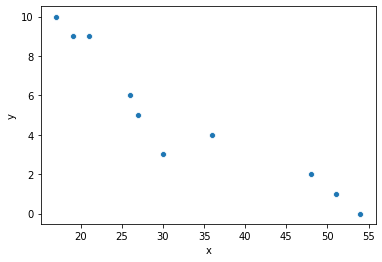

In [20]:
# Your code here.
sns.scatterplot(x=student_data['x'],y=student_data['y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
#No can see a negative trend. its correlation must be strong and negative. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
# Your response here.
student_data.corr()

,x,y
x,1.000000,-0.939163
y,-0.939163,1.000000


In [23]:
student_data.cov()

,x,y
x,187.655556,-45.566667
y,-45.566667,12.544444


In [24]:
# Covariance measures the directional relationship between the returns on two variables. If it has a  positive covariance
# it means that they move together while a negative covariance means they move inversely. In other words, if positive,
# if one variable grows, the other also will grow.
#The diference is the scala(? idont know). When X increase, Y will decrease.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

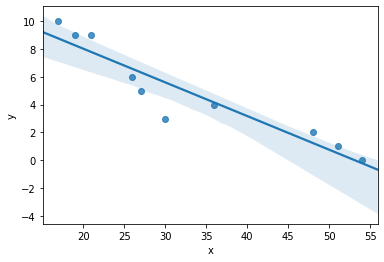

In [25]:
# Your response here.
sns.regplot(x=student_data['x'],y=student_data['y'])
#

Plot your regression model on your scatter plot.

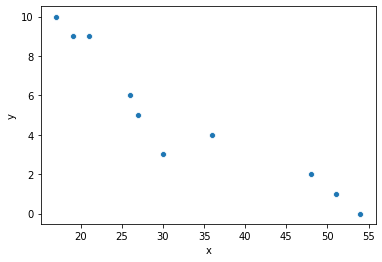

In [26]:
# Your code here.
sns.scatterplot(x=student_data['x'],y=student_data['y'])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [27]:
# Your response here. 
# I can say that hiher the age, lower are the probability of tardiness. They have strong correlation and negative.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
# X deve ser um dataframe,
# y deve ser um panda series

In [31]:
# Your response here. 
y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

In [39]:
vehicles[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corr().loc['CO2 Emission Grams/Mile',:].sort_values()

Combined MPG              -0.926229
Year                      -0.222300
Cylinders                  0.752393
Fuel Cost/Year             0.930865
Fuel Barrels/Year          0.986189
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
# the most important are: 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year' 
#All those affects CO2 emissions some how.
# for determining the amount would be the 'Fuel Barrels/Year' because we can estimated if this variable but the other 
#still affects (lower the price, people use more; more cylinders probably produces more amount)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [45]:
# Your response here. 
model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print ('The slope is: ' , str(model.coef_))
print ('The intercept is: ' , str(model.intercept_))

The slope is:  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
The intercept is:  769.8882836465224


In [47]:
model.predict(X)

#r2_score(y_observed, y_predicted)

array([522.03038361, 671.00105318, 552.68495072, ..., 230.01342446,
       229.69280773, 239.33283552])

In [52]:
#explica quanto seu suas variaveis explicam seus dados

model.score(X,y)

#R^2
#o que todas as variáveis juntas explicam os dados
#nao se soma o score de cada um direto porque o modelo verifica se alguma variável já tem alguma parcela de informação
#sendo explicada por alguma outra varíavel. Ou seja, ele adiciona informação extra para explicar. Existe casos
#em que atrapalha


0.9808734920269122

In [56]:
model = sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
r2_score(y, predictions)


0.9800347984321202

In [57]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                             14:10:22   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#most important: all of them are important except the year (because of correlation power). Im really cofident because i've
# got a score of 98% and R2 score of 0.999. It means it explains 99,9% of the data. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [61]:
# Your code here. 

x_values =pd.Series([1,3,4,6,8,9,11,14])
y_values =pd.Series([1, 2, 4, 4, 5, 7, 8, 13])

data_error = pd.DataFrame([x_values]).T
data_error['y'] = y_values
data_error = data_error.rename(columns={0:'x'})

In [62]:
data_error

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

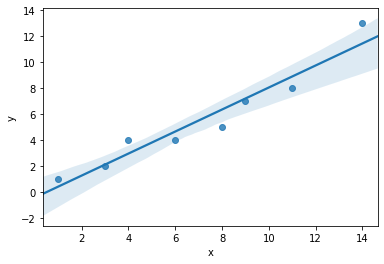

In [63]:
# Your code here.

sns.regplot(x=data_error['x'],y=data_error['y'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [76]:
X = data_error[['x']]
y = data_error['y']

In [77]:
model = LinearRegression()
model.fit(X,y)
print ('The slope is: ' , str(model.coef_))
print ('The intercept is: ' , str(model.intercept_))
print('Predict value: ',model.predict(X))
print('score',model.score(X,y))


The slope is:  [0.84848485]
The intercept is:  -0.43939393939393945
Predict value:  [ 0.40909091  2.10606061  2.95454545  4.65151515  6.34848485  7.1969697
  8.89393939 11.43939394]
score 0.9316696375519905


In [75]:
# Your response here. 
# they tell that the correlation is strong and positive. 
X=data_error[['x']]
y = data_error['y']
model = sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
r2_score(y, predictions)
results.summary()

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                    4.20e-07
Time:                        14:26:36   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.8015      0.045     17.895      0.000       0.696       0.907
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                           0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

# i dont see any problematic nether outliers in the data. 

The slope is:  [0.84848485]
The intercept is:  -0.43939393939393945
Predict value:  [ 0.40909091  2.10606061  2.95454545  4.65151515  6.34848485  7.1969697  8.89393939 11.43939394]
score 0.9316696375519905



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# ????